# House Prices Advanced Regression Techniques

<!-- ![image.png](attachment:image.png) -->

This is a beginners notebook that covers all the main steps necessary to complete a Machine Learning project. Here below you can see a detailed table of contents of the work:

**PREPROCESSING & EDA**

- Importing Libraries & Data
- Dealing with Duplicates and Nan
- Looking at correlations
- Data Normalization (Plots & Tests)


**MODELING**

- Baseline Models with 10-Folds CV
- Best Model (RandomGridSearch)
- Prediction
- Submission

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
house_data = pd.read_csv('./AmesHousing.csv')
test       = pd.read_csv('./test.csv')
train      = pd.read_csv('./train.csv')

In [3]:
print('house_data.shape :', house_data.shape)
print('train.shape      :', train.shape)
print('test.shape       :', test.shape)

house_data.shape : (2930, 82)
train.shape      : (1460, 81)
test.shape       : (1459, 80)


In [4]:
print('house_data.columns :', house_data.columns)
print('train.columns      :', train.columns)
print('test.columns       :', test.columns)

house_data.columns : Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'G

In [5]:
str_delimaters = '-., |:/\\'
for c in str_delimaters:
    house_data.columns = house_data.columns.str.replace(c, '')
    train.columns      = train.columns.str.replace(c, '')
    test.columns       = test.columns.str.replace(c, '')

In [6]:
print('house_data.columns :', house_data.columns)
print('train.columns      :', train.columns)
print('test.columns       :', test.columns)

house_data.columns : Index(['Order', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
 

In [7]:
def compare_columns(df1, df2):
    df1_columns_set = set(df1.columns)
    df2_columns_set = set(df2.columns)
    print('df1_columns_set - df2_columns_set :', df1_columns_set - df2_columns_set)
    print('df2_columns_set - df1_columns_set :', df2_columns_set - df1_columns_set)

In [8]:
compare_columns(house_data, train)

df1_columns_set - df2_columns_set : {'Order', 'PID'}
df2_columns_set - df1_columns_set : {'Id'}


In [9]:
compare_columns(house_data, test)

df1_columns_set - df2_columns_set : {'SalePrice', 'Order', 'PID'}
df2_columns_set - df1_columns_set : {'Id'}


In [10]:
compare_columns(train, test)

df1_columns_set - df2_columns_set : {'SalePrice'}
df2_columns_set - df1_columns_set : set()


In [11]:
house_data[['SalePrice']].head()

,SalePrice
0,215000
1,105000
2,172000
3,244000
4,189900


In [12]:
house_data[['Order']].head()

,Order
0,1
1,2
2,3
3,4
4,5


In [13]:
house_data[['PID']].head()

,PID
0,526301100
1,526350040
2,526351010
3,526353030
4,527105010


In [14]:
train[['Id']].head()

,Id
0,1
1,2
2,3
3,4
4,5


In [15]:
train[['SalePrice']].head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [16]:
test[['Id']].head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [17]:
print('house_data[SalePrice].describe() :')
house_data['SalePrice'].describe()

house_data[SalePrice].describe() :


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
print('train[SalePrice].describe()      :')
train['SalePrice'].describe()

train[SalePrice].describe()      :


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [19]:
print('house_data [SalePrice].info() :')
house_data[['SalePrice']].info()

house_data [SalePrice].info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  2930 non-null   int64
dtypes: int64(1)
memory usage: 23.0 KB


In [20]:
print('train [SalePrice].info() :')
train[['SalePrice']].info()

train [SalePrice].info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [21]:
house_data = house_data.drop(columns=['PID', 'Order'])
train      = train.drop(columns=['Id'])
test       = test.drop(columns=['Id'])

In [22]:
compare_columns(house_data, train)

df1_columns_set - df2_columns_set : set()
df2_columns_set - df1_columns_set : set()


In [23]:
compare_columns(house_data, test)

df1_columns_set - df2_columns_set : {'SalePrice'}
df2_columns_set - df1_columns_set : set()


In [24]:
compare_columns(train, test)

df1_columns_set - df2_columns_set : {'SalePrice'}
df2_columns_set - df1_columns_set : set()


In [25]:
print('house_data.shape :', house_data.shape)
print('train.shape      :', train.shape)
print('test.shape       :', test.shape)

house_data.shape : (2930, 80)
train.shape      : (1460, 80)
test.shape       : (1459, 79)


In [26]:
common_columns = list(set(house_data.columns) & set(train.columns) & set(test.columns))
print('len of common columns :', len(common_columns))
print(list(common_columns))

len of common columns : 79
['OverallQual', 'FireplaceQu', 'MoSold', 'Exterior1st', 'BsmtFinSF1', 'Neighborhood', 'HeatingQC', 'Fence', 'LandSlope', 'GarageCars', 'MasVnrArea', 'Street', 'LandContour', 'Exterior2nd', 'BedroomAbvGr', 'Fireplaces', 'CentralAir', 'GarageQual', 'LowQualFinSF', 'GarageCond', 'SaleCondition', 'MasVnrType', '2ndFlrSF', 'Utilities', 'MiscVal', 'YearRemodAdd', 'ScreenPorch', 'Condition1', '1stFlrSF', 'HouseStyle', 'SaleType', 'MiscFeature', 'ExterCond', 'FullBath', 'YrSold', 'LotFrontage', 'BldgType', 'BsmtFullBath', 'PavedDrive', 'WoodDeckSF', 'MSZoning', 'BsmtExposure', 'KitchenQual', 'Condition2', 'PoolArea', 'BsmtFinType1', 'BsmtUnfSF', 'TotRmsAbvGrd', 'BsmtFinSF2', 'HalfBath', 'OpenPorchSF', 'KitchenAbvGr', 'Functional', 'YearBuilt', 'ExterQual', 'BsmtHalfBath', 'PoolQC', 'GarageFinish', 'GarageArea', 'Electrical', 'Foundation', 'Alley', 'RoofMatl', 'MSSubClass', 'LotArea', 'GarageYrBlt', 'EnclosedPorch', 'Heating', 'TotalBsmtSF', 'LotConfig', 'BsmtQual', '

In [27]:
def describe_column(column_name):
    print('house_data[%s].describe() :' % column_name)
    print(house_data[column_name].describe())
    print('train[%s].describe()      :' % column_name)
    print(train[column_name].describe())
    print('test[%s].describe()       :' % column_name)
    print(test[column_name].describe())

In [28]:
describe_column('MSSubClass')

house_data[MSSubClass].describe() :
count    2930.000000
mean       57.387372
std        42.638025
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
train[MSSubClass].describe()      :
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
test[MSSubClass].describe()       :
count    1459.000000
mean       57.378341
std        42.746880
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


In [29]:
describe_column('MSZoning')

house_data[MSZoning].describe() :
count     2930
unique       7
top         RL
freq      2273
Name: MSZoning, dtype: object
train[MSZoning].describe()      :
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
test[MSZoning].describe()       :
count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object


In [30]:
def info_column(column_name):
    print('house_data', column_name, '.info() :')
    print(house_data[column_name].info())
    print('+++'*20)
    print('train', column_name, '.info()      :')
    print(train[column_name].info())
    print('+++'*20)
    print('test', column_name, '.info()       :')
    print(test[column_name].info())
    print('+++'*20)

In [31]:
info_column(['MSSubClass'])

house_data ['MSSubClass'] .info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  2930 non-null   int64
dtypes: int64(1)
memory usage: 23.0 KB
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
train ['MSSubClass'] .info()      :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test ['MSSubClass'] .info()       :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1459 non-null   int64
dtypes: int64

In [32]:
info_column(['MSZoning'])

house_data ['MSZoning'] .info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSZoning  2930 non-null   object
dtypes: object(1)
memory usage: 23.0+ KB
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
train ['MSZoning'] .info()      :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSZoning  1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test ['MSZoning'] .info()       :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSZoning  1455 non-null   object
dtypes: object(1)
memory

In [33]:
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [34]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
data = pd.concat([house_data, train])
data.shape

(4390, 80)

In [37]:
data = data.drop_duplicates()
data.shape

(4197, 80)

In [38]:
test = test.drop_duplicates()
test.shape

(1459, 79)

In [39]:
del house_data, train

## EDA & VISUALIZATION

Before working with any kind of data it is important to understand them. A crucial step to this aim is the ***Exploratory data analysis (EDA)***: a combination of visualizations and statistical analysis (uni, bi, and multivariate) that helps us to better understand the data we are working with and to gain insight into their relationships. So, let's explore our target variable and how the other features influence it.


 mu = 178563.87 and sigma = 77404.49



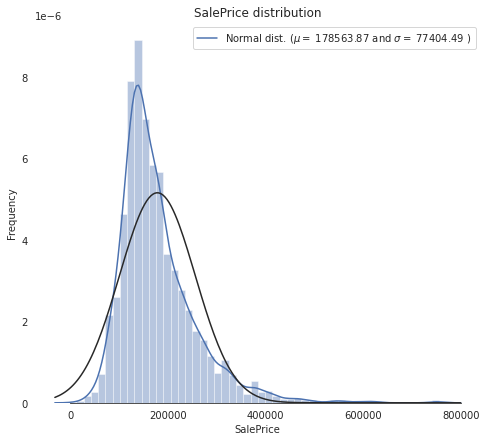

In [40]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

#Check the new distribution 
sns.distplot(data['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

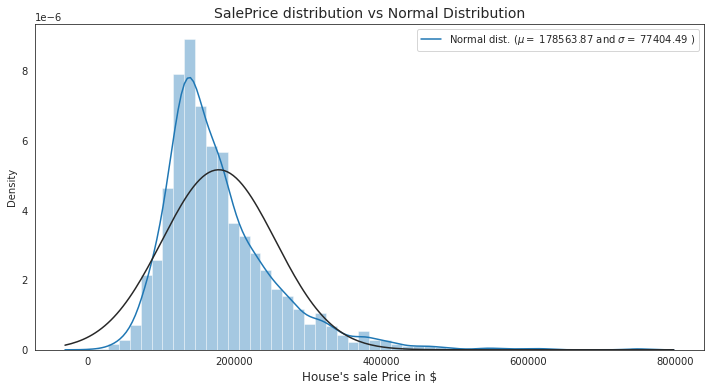

In [41]:
(mu, sigma) = norm.fit(data['SalePrice'])
plt.figure(figsize = (12,6))
sns.distplot(data['SalePrice'], kde = True, hist=True, fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 14)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.show()

In literature, acceptable values for skewness are between -0.5 and 0.5 while -2 and 2 for Kurtosis. Looking at the plot, we can clearly see how the distribution does not seem to be normal, but highly right-skewed. The non-normality of our distribution is also supported by the Shapiro test for normality (p-value really small that allows us to reject the hypotesis of normality). Despite that, let's leave it like that for now, we'll deal with that later in the notebook. 

Text(0, 0.5, 'Density')

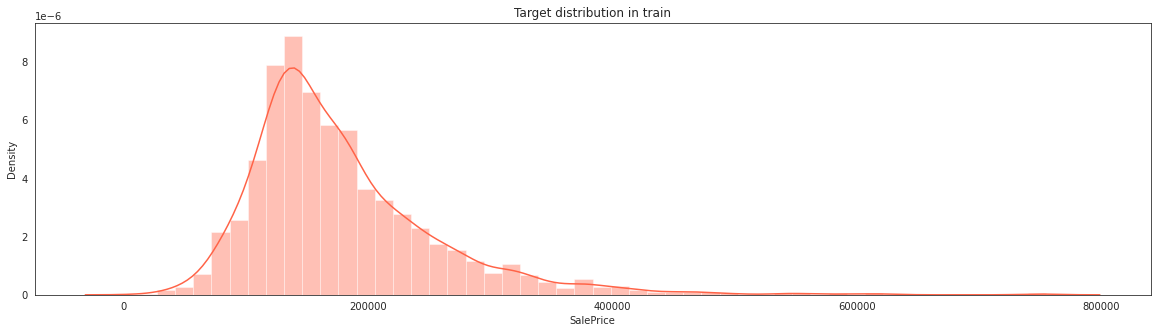

In [42]:
plt.figure(figsize=(20,5))
sns.distplot(data.SalePrice, color="tomato")
plt.title("Target distribution in train")
plt.ylabel("Density")

The sale price distribution is right-skewed and shows extreme outliers. We should log-transform the target values, as we will use some loss built on mean-squared-error which assumes that our target distribution is normal.


Text(0, 0.5, 'Density')

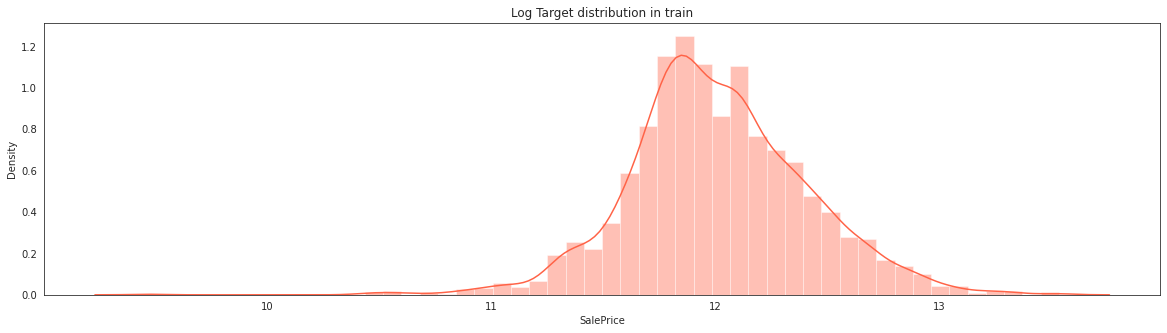

In [43]:
plt.figure(figsize=(20,5))
sns.distplot(np.log(data.SalePrice), color="tomato")
plt.title("Log Target distribution in train")
plt.ylabel("Density")

In [44]:
data["LogSalePrice"] = data['SalePrice'].apply(np.log)

In [45]:
shap_t,shap_p = stats.shapiro(data['SalePrice'])
print("Skewness: %f" % abs(data['SalePrice']).skew())
print("Kurtosis: %f" % abs(data['SalePrice']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.823831
Kurtosis: 6.112813
Shapiro_Test: 0.874586
Shapiro_Test: 0.000000


The correlation matrix is the best way to see all the numerical correlation between features. Let's see which are the feature that correlate most with our target variable.

#### Dropping nan-features

In [46]:
# determine the threshold for missing values
def percent_missing(df):
    columns_percent_missing = {}
    for column_name in df.columns:
        columns_percent_missing[column_name] = df[column_name].isnull().mean()
    return columns_percent_missing

In [47]:
columns_percent_missing = percent_missing(data)
columns_percent_missing = pd.DataFrame(sorted(columns_percent_missing.items(), key=lambda x: x[1], reverse=True))
print('Percent of missing data')
columns_percent_missing = columns_percent_missing[columns_percent_missing[1] >= 0.05]
columns_percent_missing

Percent of missing data


,0,1
0,PoolQC,0.995473
1,MiscFeature,0.963069
2,Alley,0.934000
3,Fence,0.801287
4,FireplaceQu,0.484394
5,LotFrontage,0.175125
6,GarageYrBlt,0.055278
7,GarageFinish,0.055278
8,GarageQual,0.055278
9,GarageCond,0.055278


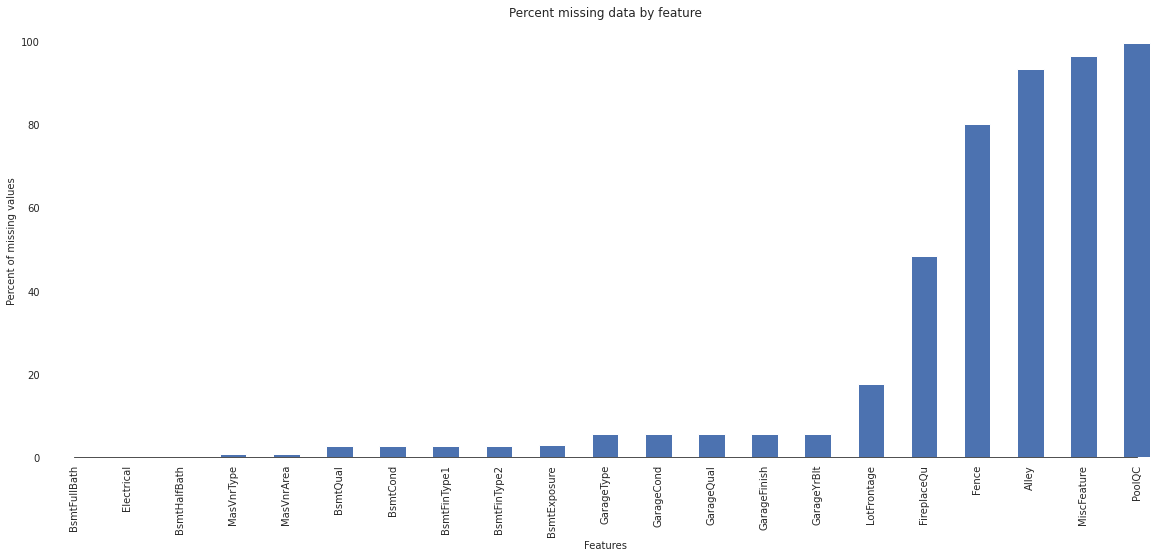

In [48]:
# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 8))
sns.set_color_codes(palette='deep')
missing = round(data.isnull().mean()*100,2)
missing = missing[missing >= 0.05]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageYrBlt'),
  Text(7, 0, 'GarageFinish'),
  Text(8, 0, 'GarageQual'),
  Text(9, 0, 'GarageCond'),
  Text(10, 0, 'GarageType')])

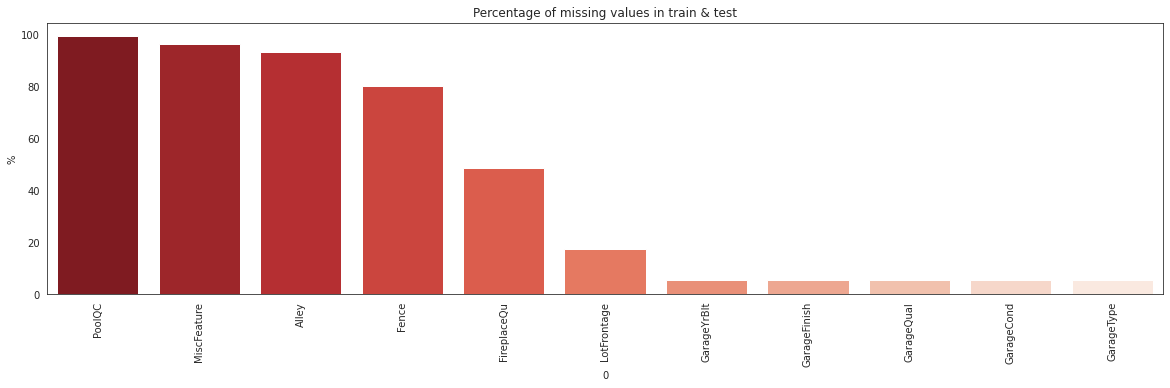

In [49]:
plt.figure(figsize=(20,5))
sns.barplot(x=columns_percent_missing[0], y=columns_percent_missing[1] * 100, palette="Reds_r");
plt.title("Percentage of missing values in train & test")
plt.ylabel("%")
plt.xticks(rotation=90)

We can see that PoolQC, MiscFeature, Alley etc. have more than 80 % missing values. In the description, we can see that this often tells us "no pool", "no miscfeature" etc.. In my opinion it's difficult to say if such a feature is important. For this reason, let's not drop them and plugin "None" later in the analysis. For numerical features we need to find an approriate strategy.


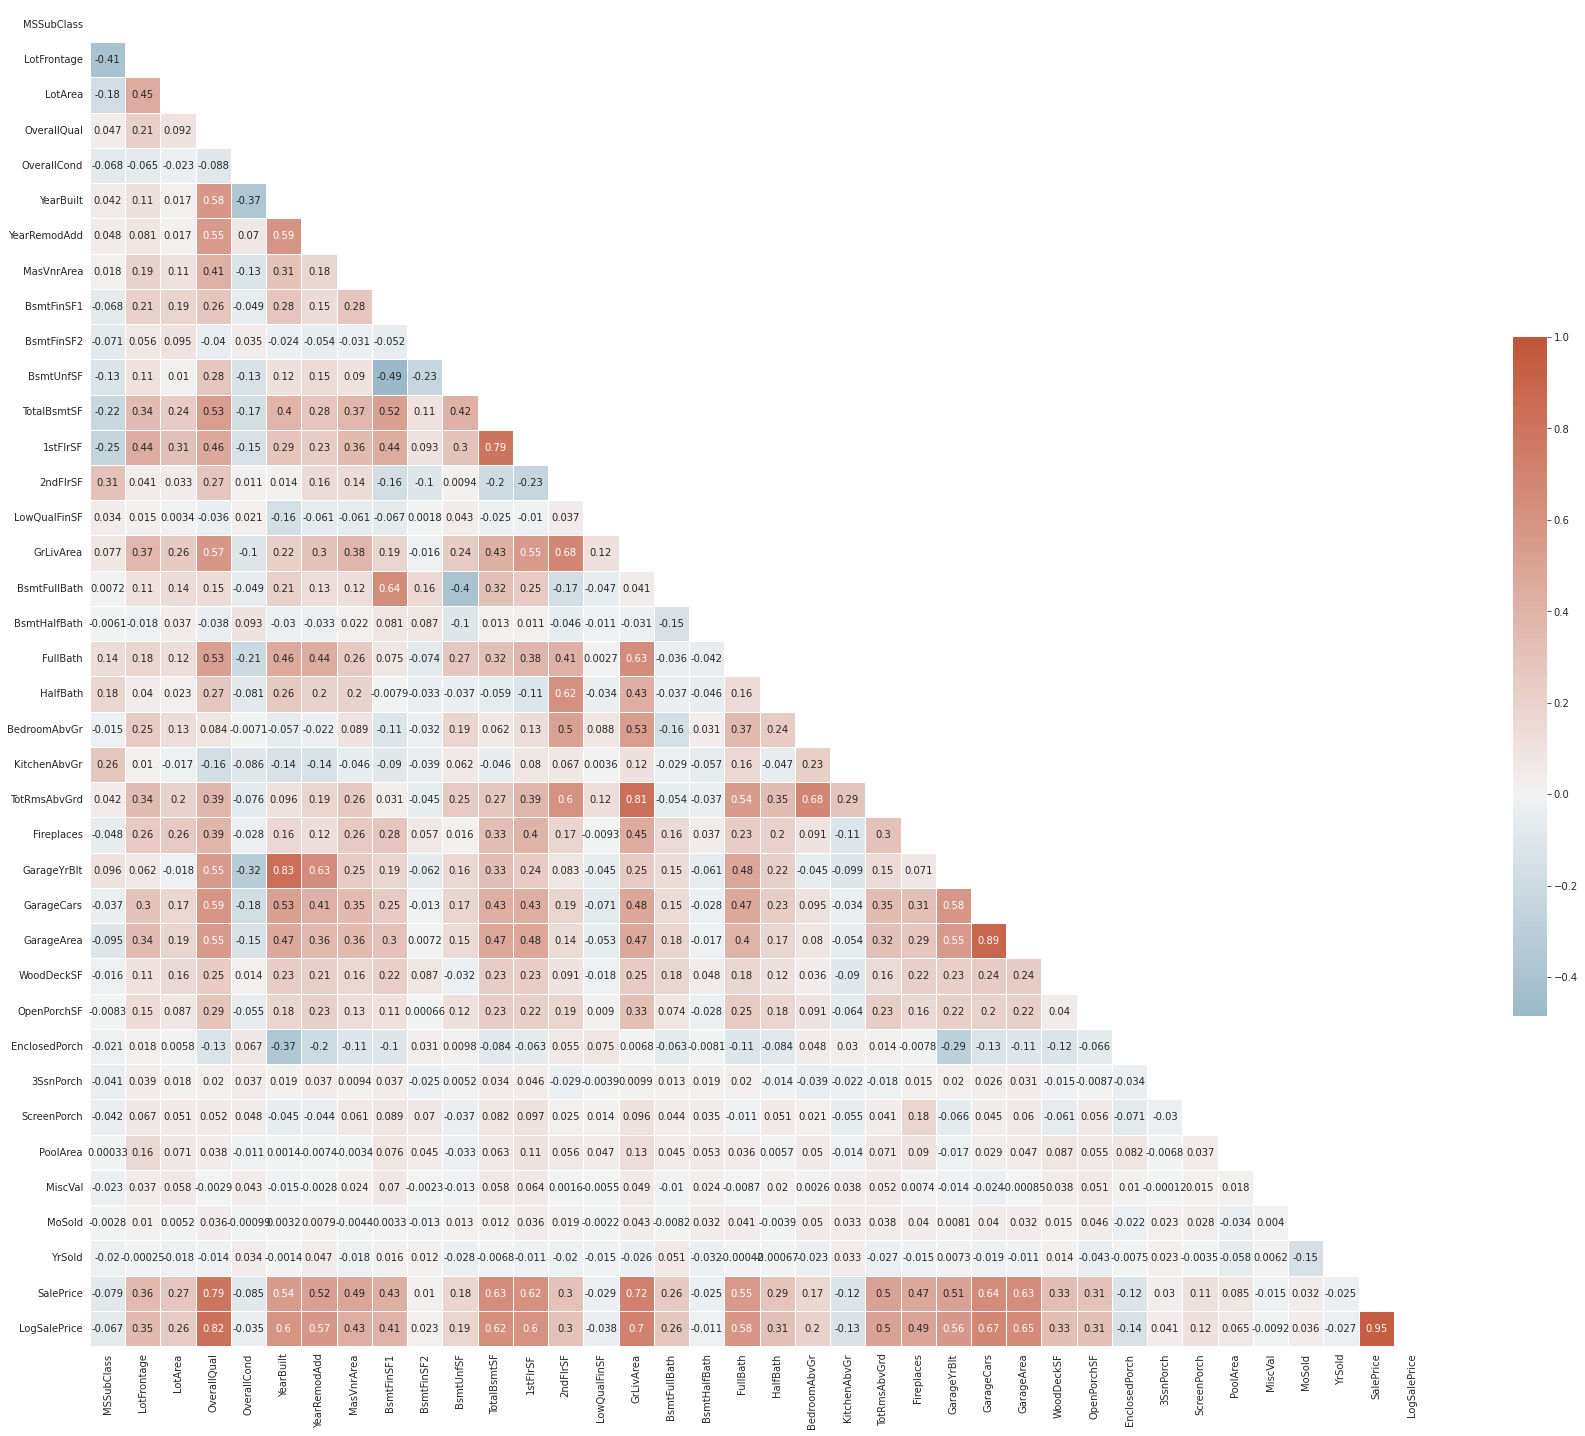

In [50]:
# Correlation Matrix
f, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Now that we know which features correlates most with our target variable we can investigate them more in depth.

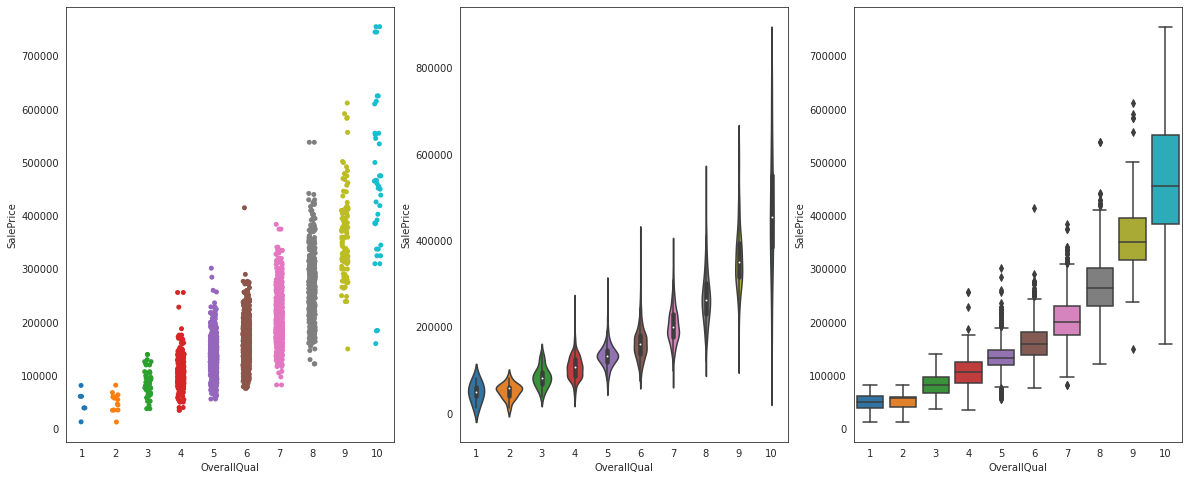

In [51]:
# OverallQuall - SalePrice [Pearson = 0.8]
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=data, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=data, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=data, x = 'OverallQual', y='SalePrice', ax = ax[2])
plt.show()

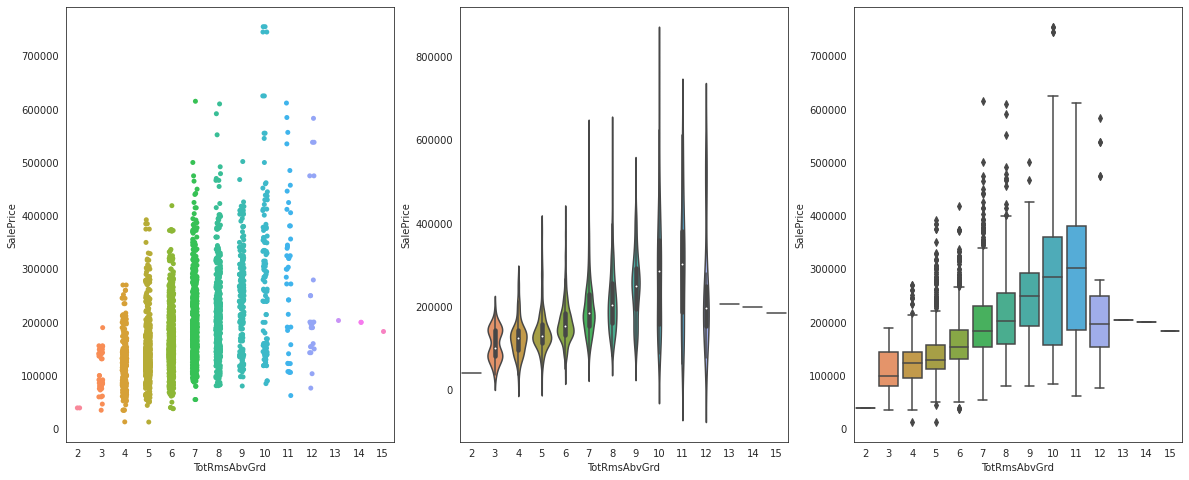

In [52]:
# TotRmsAbvGrd - SalePrice [Pearson = 0.50]
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[0])
sns.violinplot(data=data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[1])
sns.boxplot(data=data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[2])
plt.show()

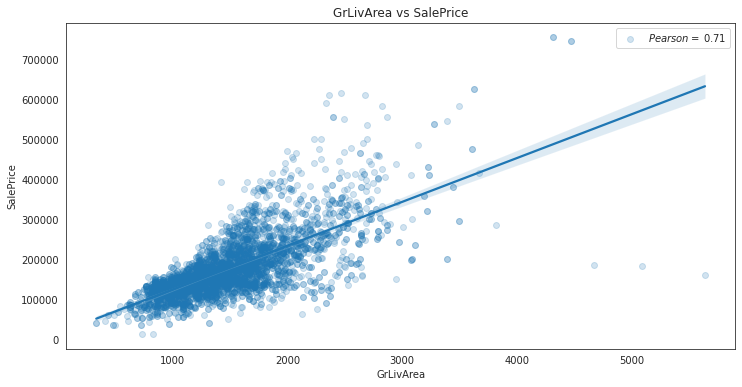

In [53]:
# GrLivArea vs SalePrice [corr = 0.71]
Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

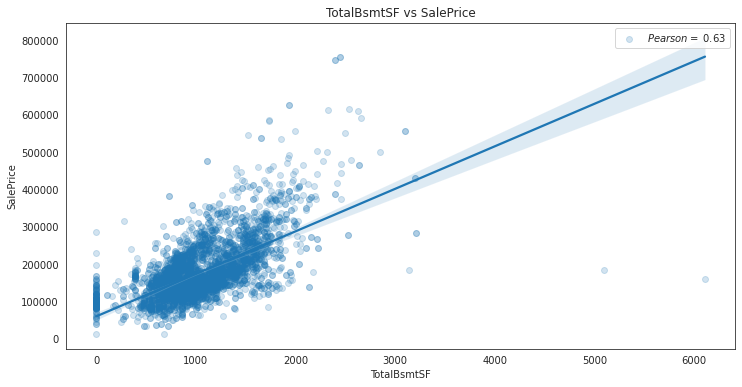

In [54]:
Pearson_TBSF = 0.63
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)], loc = 'best')
plt.show()

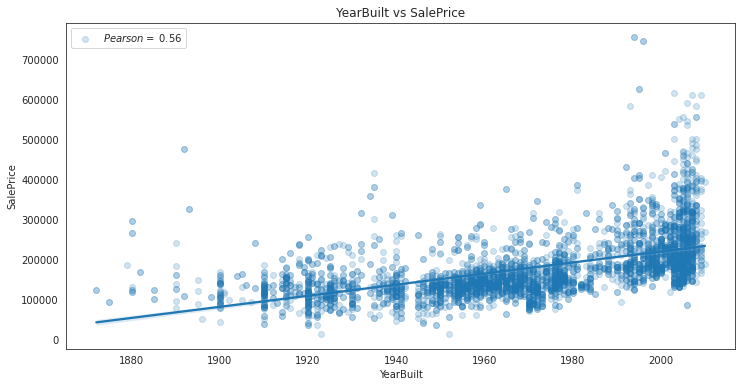

In [55]:
# YearBuilt vs SalePrice
Pearson_YrBlt = 0.56
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

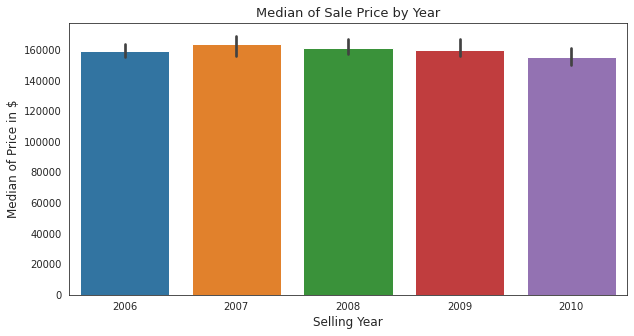

In [56]:
# Median of Sale Price by Year
plt.figure(figsize = (10,5))
sns.barplot(x='YrSold', y="SalePrice", data = data, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

##  DATA PREPROCESSING

Now that we have some insights about data, we need to preprocess them for the modeling part. The main steps are:

- Looking at potential NaN
- Dealing with categorical features (e.g. Dummy coding)
- Normalization

N.B:

Usually, in a real-world project, the test data are not available until the end. For this reason, test data should contain the same type of data of the training set to preprocess them in the same way. Here, the test set is available. It contains some observations not present in the training dataset and,the use of dummy coding could raise several issues (I spent a lot of time figuring out why I was not able to make predictions on the test set). The easiest way to solve this problem (that is not applicable if test data are not available) is to concatenate Train and Test sets, preprocess, and divide them again.


In [57]:
# Looking at NaN % within the data
nan = pd.DataFrame(data.isna().mean(), columns = ['Perc(%)'])
nan['feat'] = nan.index
nan = nan[nan['Perc(%)'] > 0].sort_values(by = ['Perc(%)'])
nan['Usability'] = np.where(nan['Perc(%)'] >= 0.02, 'Discard', 'Keep')
nan

,Perc(%),feat,Usability
BsmtFinSF2,0.000238,BsmtFinSF2,Keep
GarageArea,0.000238,GarageArea,Keep
TotalBsmtSF,0.000238,TotalBsmtSF,Keep
BsmtUnfSF,0.000238,BsmtUnfSF,Keep
BsmtFinSF1,0.000238,BsmtFinSF1,Keep
GarageCars,0.000238,GarageCars,Keep
BsmtFullBath,0.000477,BsmtFullBath,Keep
BsmtHalfBath,0.000477,BsmtHalfBath,Keep
Electrical,0.000477,Electrical,Keep
MasVnrArea,0.006671,MasVnrArea,Keep


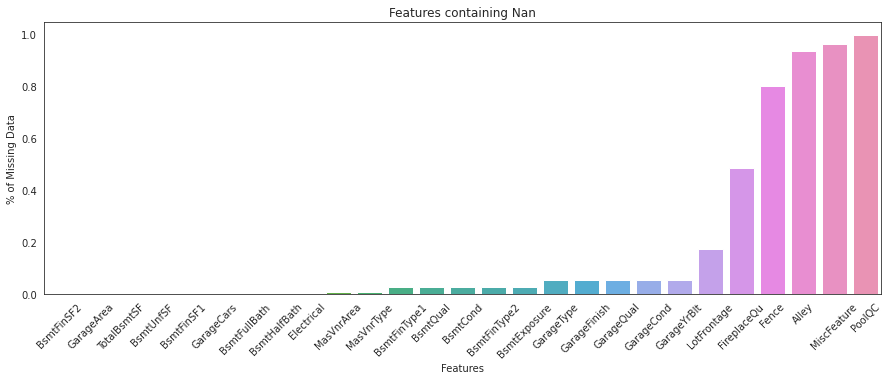

In [58]:
# Plotting Nan
plt.figure(figsize = (15,5))
sns.barplot(x = nan['feat'], y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

Are we sure that all these nans are real missing values? Looking at the given description file, we can see how the majority of these nans reflect the absence of something, and for this reason, they are not nans. We can impute them (for numerical features) or substitute them with data in the file:

In [59]:
droped_columns = nan[nan['Perc(%)'] >= 0.02]['feat']
droped_columns

BsmtFinType1    BsmtFinType1
BsmtQual            BsmtQual
BsmtCond            BsmtCond
BsmtFinType2    BsmtFinType2
BsmtExposure    BsmtExposure
GarageType        GarageType
GarageFinish    GarageFinish
GarageQual        GarageQual
GarageCond        GarageCond
GarageYrBlt      GarageYrBlt
LotFrontage      LotFrontage
FireplaceQu      FireplaceQu
Fence                  Fence
Alley                  Alley
MiscFeature      MiscFeature
PoolQC                PoolQC
Name: feat, dtype: object

In [60]:
# Removing the useless variables
data = data.drop(columns=droped_columns)
data.shape

(4197, 65)

In [61]:
# Removing the useless variables
test = test.drop(columns=droped_columns)
test.shape

(1459, 63)

In [62]:
# Converting non-numeric predictors stored as numbers into string
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['YrSold']     = data['YrSold'].apply(str)
data['MoSold']     = data['MoSold'].apply(str)

In [63]:
# Filling Categorical NaN (That we know how to fill due to the description file )
data['Functional']  = data['Functional'].fillna('Typ')
data['Electrical']  = data['Electrical'].fillna("SBrkr")
data['KitchenQual'] = data['KitchenQual'].fillna("TA")
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType']    = data['SaleType'].fillna(data['SaleType'].mode()[0])

In [64]:
for col in ('GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

In [65]:
# Checking the features with NaN remained out
def check_nan_exists(df):
    for col in df:
        if df[col].isna().sum() > 0:
            print(col, df[col].isna().sum())

In [66]:
check_nan_exists(data)

MasVnrType 28
MasVnrArea 28
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2


In [67]:
check_nan_exists(test)

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageCars 1
GarageArea 1
SaleType 1


In [68]:
def replace_nan_values(df):
    for col in df:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])

In [69]:
replace_nan_values(data)

In [70]:
replace_nan_values(test)

In [71]:
check_nan_exists(data)

In [72]:
check_nan_exists(test)

In [73]:
print(data.shape)
print(test.shape)

(4197, 65)
(1459, 63)


### FEATURE ENGINEERING

Let's create some new features combining the ones that we already have. These could help us to increase the performance of the model!

In [74]:
data["SqFtPerRoom"] = data["GrLivArea"] / (data["TotRmsAbvGrd"] + data["FullBath"] +
                                           data["HalfBath"] + data["KitchenAbvGr"])
data['Total_Home_Quality'] = data['OverallQual'] + data['OverallCond']
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                           data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))
data["HighQualSF"] = data["1stFlrSF"] + data["2ndFlrSF"]

In [75]:
# Creating dummy variables from categorical features
data_dummy = pd.get_dummies(data)

In [76]:
numeric_features = data_dummy.dtypes[data_dummy.dtypes != object].index
numeric_features

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_Oth', 'SaleType_VWD', 'SaleType_WD', 'SaleType_WD ',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=274)

In [77]:
skewed_features  = data_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_features

KitchenQual_Po         64.761101
RoofMatl_ClyTile       64.761101
MSSubClass_150         64.761101
Exterior2nd_Other      64.761101
Exterior2nd_PreCast    64.761101
                         ...    
Heating_GasA           -7.330359
RoofMatl_CompShg       -7.723860
Condition2_Norm        -9.845744
Street_Pave           -15.616863
Utilities_AllPub      -37.363093
Length: 274, dtype: float64

In [78]:
high_skew = skewed_features[skewed_features > 0.5]
high_skew

KitchenQual_Po         64.761101
RoofMatl_ClyTile       64.761101
MSSubClass_150         64.761101
Exterior2nd_Other      64.761101
Exterior2nd_PreCast    64.761101
                         ...    
Exterior2nd_VinylSd     0.692374
Exterior1st_VinylSd     0.668784
BsmtFullBath            0.603552
OverallCond             0.589436
MSSubClass_20           0.569283
Length: 236, dtype: float64

In [79]:
skew_index = high_skew.index
skew_index

Index(['KitchenQual_Po', 'RoofMatl_ClyTile', 'MSSubClass_150',
       'Exterior2nd_Other', 'Exterior2nd_PreCast', 'MasVnrType_CBlock',
       'Exterior1st_PreCast', 'Neighborhood_Landmrk', 'Utilities_NoSeWa',
       'SaleType_VWD',
       ...
       'ExterQual_Gd', 'TotRmsAbvGrd', 'Fireplaces', 'LotShape_IR1',
       'HalfBath', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd',
       'BsmtFullBath', 'OverallCond', 'MSSubClass_20'],
      dtype='object', length=236)

In [80]:
# Normalize skewed features using log_transformation
for i in skew_index:
    data_dummy[i] = np.log1p(data_dummy[i])

In [81]:
data_dummy.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10.366309,6,1.791759,1960,1960,4.727388,6.461468,0.000000,6.091310,6.985642,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0
1,9.360741,5,1.945910,1961,1961,0.000000,6.150603,4.976734,5.602119,6.783325,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0
2,9.565775,6,1.945910,1958,1958,4.691348,6.828712,0.000000,6.008813,7.192934,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0
3,9.320181,7,1.791759,1968,1968,0.000000,6.971669,0.000000,6.952729,7.654917,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0
4,9.534668,5,1.791759,1997,1998,0.000000,6.674561,0.000000,4.927254,6.834109,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0


In [82]:
print(list(data_dummy.columns))

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'LogSalePrice', 'SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms', 'HighQualSF', 'MSSubClass_120', 'MSSubClass_150', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_A (agr)', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_I (all)', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotS

In [83]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4197 entries, 0 to 1459
Columns: 274 entries, LotArea to SaleCondition_Partial
dtypes: float16(209), float64(31), int64(6), uint8(28)
memory usage: 3.1 MB


In [84]:
data_dummy.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,...,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000
mean,9.095737,6.059566,1.870750,1970.481296,1984.003097,2.047934,4.263797,0.690191,5.605300,6.723059,...,0.001156,0.000165,0.209351,0.604241,0.042969,0.002644,0.005951,0.010742,0.851322,0.040802
std,0.514952,1.384332,0.172607,30.078939,20.688639,2.608792,2.968170,1.885975,1.874394,1.185305,...,0.028305,0.010704,0.318359,0.489071,0.167236,0.042755,0.063965,0.085632,0.355813,0.163086
min,7.170888,1.000000,0.693147,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.915567,5.000000,1.791759,1953.000000,1965.000000,0.000000,0.000000,0.000000,5.379897,6.674561,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.149103,6.000000,1.791759,1972.000000,1992.000000,0.000000,5.937536,0.000000,6.135565,6.890609,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.351493,7.000000,1.945910,1999.000000,2003.000000,5.068904,6.591674,0.000000,6.677083,7.152269,...,0.000000,0.000000,0.693359,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12.279537,10.000000,2.302585,2010.000000,2010.000000,7.378384,8.638525,7.331060,7.756623,8.717846,...,0.693359,0.693359,0.693359,1.000000,0.693359,0.693359,0.693359,0.693359,1.000000,0.693359


In [85]:
data_dummy.shape

(4197, 274)

In [86]:
def get_datatypes(df):
    dtypes = {}
    for column_name in df:
        x = df[column_name].dtype
        dtypes[x] = dtypes.get(x, 0) + 1
    return dtypes

In [87]:
get_datatypes(data_dummy)

{dtype('float64'): 31,
 dtype('int64'): 6,
 dtype('float16'): 209,
 dtype('uint8'): 28}

Now let's try to tranform our target distribution into a normal one. To do this we use a log transformation. We will use qq-plot to see the transformation effect.  

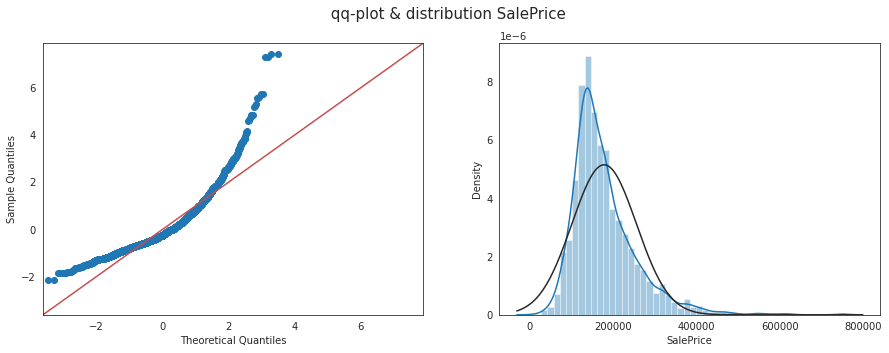

In [88]:
# SalePrice before transformation
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)
sm.qqplot(data['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(data['SalePrice'], kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

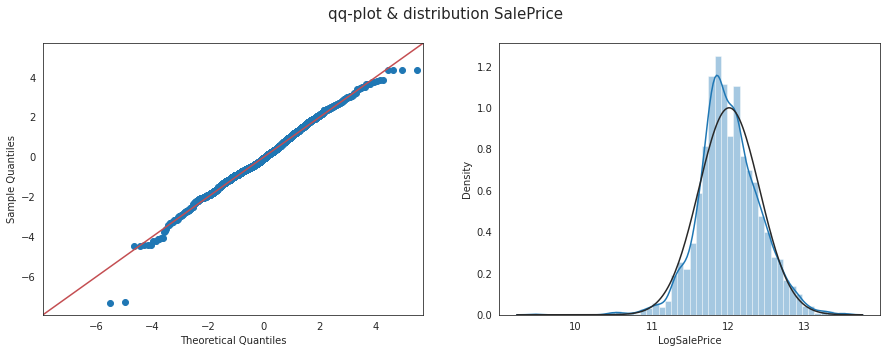

In [89]:
# SalePrice after transformation
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)
sm.qqplot(data['LogSalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(data['LogSalePrice'], kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

In [90]:
import shap
from xgboost import XGBRegressor
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [91]:
test_percentage = 0.2
test_szie = int(data_dummy.shape[0] * test_percentage)
train_data, test_data = data_dummy[:-test_szie], data_dummy[-test_szie:]

In [92]:
print('train_data.shape : ', train_data.shape)
print('test_data.shape  : ', test_data.shape)

train_data.shape :  (3358, 274)
test_data.shape  :  (839, 274)


In [93]:
# Creation of the RMSE metric:    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    X = data_dummy.drop(columns=['SalePrice', 'LogSalePrice'])
    Y = data_dummy['LogSalePrice']
    return np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=kf))

In [94]:
# 10 Fold Cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cv_scores, cv_std = [], []
baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.', 'LGBM_Reg.','SVR', 'Dec_Tree_Reg.',
                   'Random_Forest_Reg.', 'XGB_Reg.', 'Grad_Boost_Reg.', 'Cat_Boost_Reg.','Stacked_Reg.']

In [95]:
# Linear Regression
lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression
brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor
l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression
svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor
dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor
rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor
xgb = XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor
gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor
catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor
stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)
score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

Learning rate set to 0.050509
0:	learn: 0.3844607	total: 66.5ms	remaining: 1m 6s
1:	learn: 0.3708727	total: 72.1ms	remaining: 36s
2:	learn: 0.3584294	total: 77.3ms	remaining: 25.7s
3:	learn: 0.3473445	total: 82.6ms	remaining: 20.6s
4:	learn: 0.3361639	total: 88.5ms	remaining: 17.6s
5:	learn: 0.3254179	total: 95.2ms	remaining: 15.8s
6:	learn: 0.3154211	total: 101ms	remaining: 14.4s
7:	learn: 0.3056638	total: 108ms	remaining: 13.4s
8:	learn: 0.2969783	total: 114ms	remaining: 12.6s
9:	learn: 0.2878650	total: 120ms	remaining: 11.9s
10:	learn: 0.2801558	total: 126ms	remaining: 11.3s
11:	learn: 0.2725866	total: 131ms	remaining: 10.8s
12:	learn: 0.2650836	total: 137ms	remaining: 10.4s
13:	learn: 0.2579682	total: 142ms	remaining: 9.99s
14:	learn: 0.2509894	total: 147ms	remaining: 9.67s
15:	learn: 0.2445385	total: 153ms	remaining: 9.38s
16:	learn: 0.2380963	total: 158ms	remaining: 9.16s
17:	learn: 0.2321565	total: 164ms	remaining: 8.93s
18:	learn: 0.2263891	total: 169ms	remaining: 8.72s
19:	lea

In [96]:
final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

In [97]:
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,Linear_Reg.,0.124825,0.017246
1,Bayesian_Ridge_Reg.,0.114771,0.012347
2,LGBM_Reg.,0.098855,0.011408
3,SVR,0.263853,0.010770
4,Dec_Tree_Reg.,0.137206,0.012050
5,Random_Forest_Reg.,0.100441,0.013321
6,XGB_Reg.,0.092572,0.012429
7,Grad_Boost_Reg.,0.113027,0.009594
8,Cat_Boost_Reg.,0.088584,0.013173
9,Stacked_Reg.,0.084120,0.011871


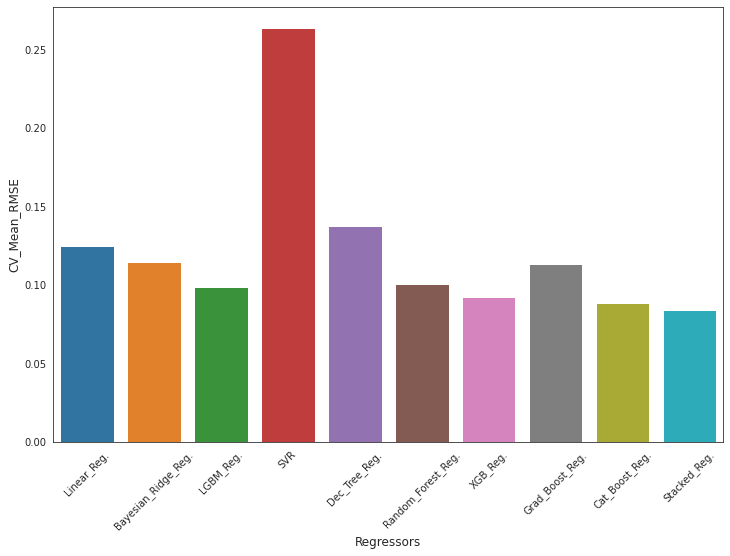

In [98]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()